
**SOLUCIÓN RETO TECNOLOGICO 4 - MACHINE LEARNING SAPIENCIA**

**Pistas de un aeropuerto**
https://www.kaggle.com/francuzovd/airplane-tickets-from-moscow-2022 


**Estudiantes:**

  **Ricardo Tangarife González**

  **Daniel Borrás Jiménez**

  **Santiago López Aristizábal**
  
  **Michael Stiven Bustos Aguirre**

    


In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# **Data Frame ticket_dataset_MOW**

In [2]:
#Se carga la base de datos csv 
col_list = ["value", "origin", "number_of_changes", "gate", "found_at", "destination", "depart_date", "airline"]
data = pd.read_csv("/content/ticket_dataset_MOW.csv", usecols=col_list)
data.head(5)


,value,origin,number_of_changes,gate,found_at,destination,depart_date,airline
0,10570.0,MOW,1.0,Kiwi.com,2022-02-09T07:12:09,SPU,2022-02-25,N4
1,7290.0,MOW,2.0,Kiwi.com,2022-02-03T12:52:42,SZF,2022-02-23,A4
2,8130.0,MOW,1.0,KupiBilet.ru,2022-02-09T07:10:22,ABA,2022-02-21,WZ
3,8220.0,MOW,1.0,Kiwi.com,2022-02-09T09:46:49,CAI,2022-02-28,DP
4,6819.0,MOW,2.0,Kiwi.com,2022-02-09T06:08:41,GZT,2022-02-16,DP


In [3]:
#Información básica del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   value              4781 non-null   float64
 1   origin             4781 non-null   object 
 2   number_of_changes  4781 non-null   float64
 3   gate               4781 non-null   object 
 4   found_at           4781 non-null   object 
 5   destination        4781 non-null   object 
 6   depart_date        4781 non-null   object 
 7   airline            4781 non-null   object 
dtypes: float64(2), object(6)
memory usage: 298.9+ KB


In [4]:
#Información datos numericos

data.describe()

,value,number_of_changes
count,4781.000000,4781.000000
mean,14117.101862,1.206651
std,13688.069850,0.883582
min,888.000000,0.000000
25%,6392.000000,1.000000
50%,9700.000000,1.000000
75%,16988.000000,2.000000
max,291808.000000,5.000000


(4781, 8)


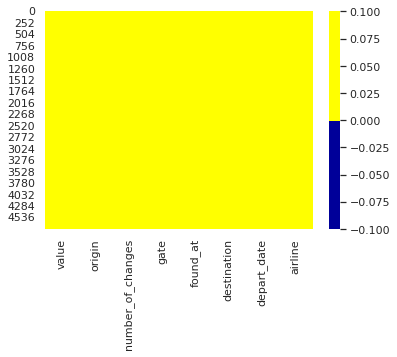

In [5]:
#Se visualiza la forma y mapa de calor para ver valores perdidos
print(data.shape)
cols  = data.columns
colours = ['#000099', '#ffff00']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
#Porcentaje de valores perdidos

for col in data.columns:
  missing_data = np.mean(data[col].isnull())
  print("{} - {}%".format(col, round(missing_data*100)))

value - 0%
origin - 0%
number_of_changes - 0%
gate - 0%
found_at - 0%
destination - 0%
depart_date - 0%
airline - 0%


In [7]:
#Se eliminan los valores con NaN
data.dropna(inplace=True)
data.shape

(4781, 8)

# **Json Airports**

In [8]:
#Lectura del json Airports
path_to_airports_json_file = "/content/IATA_Airports.json"

airports_df = pd.read_json(path_to_airports_json_file)

airports_df.head(10)

,city_code,country_code,name_translations,time_zone,flightable,coordinates,name,code,iata_type
0,PIT,US,{'en': 'Pittsburgh International Airport'},America/New_York,True,"{'lat': 40.49585, 'lon': -80.25657}",Питтсбург Интернэшинл,PIT,airport
1,GAL,US,{'en': 'Edward G. Pitka Sr. Airport'},America/Anchorage,True,"{'lat': 64.73798, 'lon': -156.94186}",Галена,GAL,airport
2,YAG,CA,{'en': 'Fort Frances Municipal Airport'},America/Winnipeg,True,"{'lat': 48.65278, 'lon': -93.44722}",Форт-Франсес,YAG,airport
3,ILD,ES,{'en': 'Lleida Railway Station'},Europe/Madrid,True,"{'lat': 41.61667, 'lon': 0.6333300000000001}",Льейда (жд вокзал),QLQ,railway
4,SVX,RU,{'en': 'Koltsovo International Airport'},Asia/Yekaterinburg,True,"{'lat': 56.750336, 'lon': 60.804314}",Кольцово,SVX,airport
5,MTJ,US,{'en': 'Montrose Regional Airport'},America/Denver,True,"{'lat': 38.51029, 'lon': -107.89696}",Монтроз,MTJ,airport
6,JOI,BR,{'en': 'Joinville-Lauro Carneiro de Loyola Air...,America/Sao_Paulo,True,"{'lat': -26.233334, 'lon': -48.783333}",Лауро Карнейро де Лойола,JOI,airport
7,EGE,US,{'en': 'Beaver Creek Bus Station'},America/Denver,True,"{'lat': 39.640263, 'lon': -106.3742}",Вейл (автовокзал),ZBV,bus
8,RRS,NO,{'en': 'Roros Airport'},Europe/Oslo,True,"{'lat': 62.579166, 'lon': 11.345556}",Рёрус,RRS,airport
9,PDX,US,{'en': 'Portland International Airport'},America/Los_Angeles,True,"{'lat': 45.588997, 'lon': -122.5929}",Портленд,PDX,airport


In [9]:
#información básica del Data Frame Airports
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city_code          3547 non-null   object
 1   country_code       3547 non-null   object
 2   name_translations  3547 non-null   object
 3   time_zone          3547 non-null   object
 4   flightable         3547 non-null   bool  
 5   coordinates        3547 non-null   object
 6   name               3390 non-null   object
 7   code               3547 non-null   object
 8   iata_type          3547 non-null   object
dtypes: bool(1), object(8)
memory usage: 225.3+ KB


In [10]:
# Se verifican los tipos de códigos IATA
airports_df["iata_type"].unique()

array(['airport', 'railway', 'bus', 'heliport', 'military', 'seaplane',
       'harbour', 'airline'], dtype=object)

In [11]:
# Limpieza de la columna name_translation
airports_df["name_translations"]= airports_df["name_translations"].apply(lambda x: x["en"])
# Se dejan solo los códigos IATA de aeropuertos
airports_df = airports_df[airports_df["iata_type"]=="airport"]    
airports_df.head()

,city_code,country_code,name_translations,time_zone,flightable,coordinates,name,code,iata_type
0,PIT,US,Pittsburgh International Airport,America/New_York,True,"{'lat': 40.49585, 'lon': -80.25657}",Питтсбург Интернэшинл,PIT,airport
1,GAL,US,Edward G. Pitka Sr. Airport,America/Anchorage,True,"{'lat': 64.73798, 'lon': -156.94186}",Галена,GAL,airport
2,YAG,CA,Fort Frances Municipal Airport,America/Winnipeg,True,"{'lat': 48.65278, 'lon': -93.44722}",Форт-Франсес,YAG,airport
4,SVX,RU,Koltsovo International Airport,Asia/Yekaterinburg,True,"{'lat': 56.750336, 'lon': 60.804314}",Кольцово,SVX,airport
5,MTJ,US,Montrose Regional Airport,America/Denver,True,"{'lat': 38.51029, 'lon': -107.89696}",Монтроз,MTJ,airport


# **Json Airlines**

In [12]:
#Lectura del json Airlines
path_to_airlines_json_file = "/content/IATA_Airlines.json"
airlines_df = pd.read_json(path_to_airlines_json_file)
airlines_df.head()

,name,code,name_translations
0,None,DN,{'en': 'Norwegian Air'}
1,None,AI,{'en': 'Air India'}
2,None,V1,"{'en': 'IBS Software Services Americas, Inc.'}"
3,None,DE,{'en': 'Condor'}
4,Аврора,HZ,{'en': 'Aurora'}


In [13]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               409 non-null    object
 1   code               1067 non-null   object
 2   name_translations  1067 non-null   object
dtypes: object(3)
memory usage: 25.1+ KB


In [14]:
#Limpieza de la columna name_translation
airlines_df["name_translations"]= airlines_df["name_translations"].apply(lambda x: x["en"])
# Se elimina la columna name
airlines_df = airlines_df.drop(['name'],1)
airlines_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,code,name_translations
0,DN,Norwegian Air
1,AI,Air India
2,V1,"IBS Software Services Americas, Inc."
3,DE,Condor
4,HZ,Aurora


# Actividad

In [15]:
#Agrupe los vuelos por aerolínea y por país de destino

#Se crea función para pasar de código de ciudad a código de país para ser agrupados por país
def getCountry(x):
  try:
    country = airports_df[["code", 'country_code']].loc[(airports_df['code'] == x)]['country_code'].iloc[0]
  except:
    country = 'NN'
  return country

def punto_1(data):
  #Se crea copia del dataFrame
  data_country = data.copy()
  #Se hace el llamado a la función para cambiar el código de aeropuerto destino por país destino
  data_country["destination"] = data_country["destination"].apply(lambda x: getCountry(x))
  #Se agrupan por aerolínea y por país destino
  data_country = data_country.groupby(['airline', 'destination']).size()
  #Como el resultado anterior es un Series con multi-index, se pasa a Dataframe
  data_country = pd.DataFrame({'(aerolinea, pais destino)':data_country.index.to_flat_index(), 'vuelos':data_country.values})
  #El resultado anterior de tupla multi-index se pasa a columnas independientes del dataframe, que sean por aerolinea y por país de destino
  data_country['Aerolinea'], data_country['Pais Destino'] = zip(*data_country["(aerolinea, pais destino)"])
  #Se elimina columna multi-index de tupla
  data_country = data_country.drop('(aerolinea, pais destino)',1)
  #Se retorna el dataframe resultante agrupado de vuelos por aerolinea y por país destino
  #print(data_country)
  return data_country


In [16]:
punto_1(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,vuelos,Aerolinea,Pais Destino
0,3,2L,CH
1,3,2W,DO
2,1,4G,RU
3,1,5F,AM
4,1,5F,GE
...,...,...,...
862,1,ZF,TR
863,2,ZF,UZ
864,2,ВГ,RU
865,3,ГЭ,RU


In [17]:
#Liste los vuelos por aerolínea, por día de menor a mayor y de mayor a menor.  El usuario debe elegir el orden de visualización.


#Se imprimen en pantalla las opciones de visaulización a elegir por el usuario
def getOrden():
  print("\nIngrese el número entero correspondiente al orden de visualización que desea: ")
  print("Opción 1. De menor a mayor")
  print("Opción 2. De mayor a menor")
  while True:
    opVisualizacion = input(": ")                                 # Se captura la opción de orden de visualización.
    if opVisualizacion.isdigit():
        opVisualizacion = int(opVisualizacion)
        if(opVisualizacion == 1):                         # Se verifica que la opción de visualización ingresada sea correcta
          opVisualizacion = True
          return opVisualizacion
        elif(opVisualizacion == 2):
          opVisualizacion = False
          return opVisualizacion
    print("Opción inválida")                 # Se presenta mensaje en caso de opción invalida ingresada por el usuario

def punto_2(data, opcion=None):
  if(opcion is None):
    opVisualizacion = getOrden()
  else:
    opVisualizacion = opcion
  #Se realiza el listado de los vuelos por aerolínea ordenados por día, ascendente o descendente
  output_2 = data.sort_values(['airline','depart_date'],ascending=opVisualizacion).groupby(['airline', 'depart_date']).head()
  #print(data.sort_values(['airline','depart_date'],ascending=opVisualizacion).groupby(['airline', 'depart_date']).head())
  return output_2


In [18]:
punto_2(data,True)

,value,origin,number_of_changes,gate,found_at,destination,depart_date,airline
2606,13927.0,MOW,1.0,Kiwi.com,2022-02-07T12:21:26,BRN,2022-07-11,2L
3104,22595.0,MOW,1.0,Kiwi.com,2022-02-08T21:26:36,BRN,2022-08-08,2L
3589,26978.0,MOW,2.0,Kiwi.com,2022-02-07T09:27:40,BRN,2022-09-01,2L
2748,33597.0,MOW,2.0,Kiwi.com,2022-02-08T19:14:27,SDQ,2022-07-13,2W
3243,39105.0,MOW,3.0,Tickets.ru,2022-02-03T18:04:45,SDQ,2022-08-15,2W
...,...,...,...,...,...,...,...,...
437,3040.0,MOW,1.0,OZON,2022-02-09T08:47:23,GDZ,2022-02-17,ГЭ
944,3059.0,MOW,1.0,OZON,2022-02-09T10:23:25,GDZ,2022-03-01,ГЭ
1441,3491.0,MOW,1.0,OZON,2022-02-09T08:19:37,GDZ,2022-04-04,ГЭ
306,5175.0,MOW,1.0,Aviakassa,2022-02-08T10:59:27,KMW,2022-02-08,КБ


In [19]:
#Listado de los vuelos, por la ciudad de destino, su cantidad de escalas, Cantidad de pasajeros movilizados Ordenados de mayor a menor y viceversa.  El usuario debe elegir el orden de visualización.

def punto_3(data, opcion=None):
  #Se obtiene el orden de visualización
  if(opcion is None):
    opVisualizacion = getOrden()
  else:
    opVisualizacion = opcion

  #Se listan los vuelos segun la ciudad de destino, cantidad de escalas y cantidad de pasajeros
  data_quantity = data.groupby(['destination', 'number_of_changes']).size().sort_values(ascending=opVisualizacion)
  
  #Como el resultado anterior es un Series con multi-index, se pasa a Dataframe
  data_quantity = pd.DataFrame({'(destination, number_of_changes)':data_quantity.index.to_flat_index(), 'Cantidad Pasajeros':data_quantity.values})
  #El resultado anterior de tupla multi-index se pasa a columnas independientes del dataframe, que sean por ciudad destino y por número de escalas
  data_quantity['Ciudad Destino'], data_quantity['Cantidad Escalas'] = zip(*data_quantity["(destination, number_of_changes)"])
  #Se elimina columna multi-index de tupla
  data_quantity = data_quantity.drop('(destination, number_of_changes)',1)
  #Se retorna el dataframe resultante agrupado de vuelos por ciudad destino y por cantidad de escalas
  #print(data_quantity)
  return data_quantity

In [20]:
punto_3(data, True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Cantidad Pasajeros,Ciudad Destino,Cantidad Escalas
0,1,LHW,2.0
1,1,LRM,2.0
2,1,LRS,2.0
3,1,LUA,2.0
4,1,LUN,1.0
...,...,...,...
1514,11,KIV,0.0
1515,11,STO,1.0
1516,11,AUH,0.0
1517,11,KGD,0.0


In [21]:
#Dado un parámetro de entrada y orden seleccionado, liste la aerolínea con mayores y menores ingresos por ruta. 
def punto_4(data, opcion=None):
  #Se obtiene el orden de visualización
  if(opcion is None):
    opVisualizacion = getOrden()
  else:
    opVisualizacion = opcion

  #Ciclo para obtener los ingresos por ruta por cada aerolinea
  result = []
  for dest in data.groupby(['airline','destination']):
    aerolinea = dest[0][0]
    ruta = dest[0][1]
    ingreso = sum(dest[1]["value"])
    result.append([aerolinea, ruta, ingreso])

  #Se crea un nuevo dataframe con los valores de ingreso en total de cada ruta por aerolinea
  data_routes = pd.DataFrame(result, columns=['aerolinea', 'ruta', 'ingreso']) 

  #Se imprime la lista ordenada ascendente o descendente según el parametro ingresado
  data_routes = data_routes.sort_values(['ruta','ingreso'],ascending=opVisualizacion)
  #print(data_routes.sort_values(['ruta','ingreso'],ascending=opVisualizacion))
  return data_routes

In [22]:
punto_4(data, True)

,aerolinea,ruta,ingreso
293,AF,AAL,18144.0
341,AY,AAL,19389.0
747,EY,AAN,26774.0
1031,N4,AAQ,5278.0
1928,UT,AAQ,8802.0
...,...,...,...
1916,U6,НЖГ,60012.0
26,5N,СЕН,13624.0
27,5N,ТИО,13779.0
28,5N,ХЖР,8757.0


In [23]:
#Halle costo promedio de pasaje por vuelo, calcule el ingreso promedio por vuelo por ciudad de destino

#Se crea función para obtener el nombre de la ciudad con el codigo
def getCity(x):
  try:
    city = airports_df[["name","code"]].set_index("code").loc[x][0]
  except:
    city = 'Código: ' + x
  return city  

def punto_5 (data):
  
  mean_value_flight = data.value.mean()
  #print("El costo promedio de pasaje por vuelo es: {}".format(mean_value_flight))

  #Cada vuelo correspondería a cada destino (siempre es el mismo origen)
  mean_value_city = data.groupby("destination").value.mean().reset_index()
  mean_value_city["destination"] = mean_value_city["destination"].apply(lambda x: getCity(x))
  mean_value_city.columns = ["Ciudad Destino", "Ingreso Promedio Por Vuelo"]
  #print("El ingreso promedio por vuelo para cada ciudad de destino es:")
  #print(mean_value_city.head())
  return [mean_value_city, mean_value_flight]

In [24]:
punto_5(data)[0]

,Ciudad Destino,Ingreso Promedio Por Vuelo
0,Ольборг,12511.0
1,Эль-Айн,13387.0
2,Витязево,3233.0
3,Тирструп,11572.0
4,Абакан,9884.2
...,...,...
957,Закинтос,9306.5
958,Código: НЖГ,15917.6
959,Código: СЕН,13624.0
960,Código: ТИО,13779.0


In [25]:
#Entregue el total de pasajeros movilizados por inventario agrupado por categoría de producto.

def punto_6(data, opcion=None):
  #Se obtiene el orden de visualización
  if(opcion is None):
    opVisualizacion = getOrden()
  else:
    opVisualizacion = opcion

  #Se listan total de pasajeros movilizados por inventario por categoria de cada producto donde se compró el tiquete
  data_product = data.groupby(['gate']).size().sort_values(ascending=opVisualizacion)
  #Como el resultado anterior es un Series, se pasa a Dataframe
  data_product = pd.DataFrame({'Producto':data_product.index.to_flat_index(), 'Total Pasajeros':data_product.values})
  return data_product

In [26]:
punto_6(data, True)

,Producto,Total Pasajeros
0,Rehlat,1
1,Ethiopian Airlines,1
2,HiSky,1
3,Lucky2Go,1
4,Onetwotrip.ua,1
5,Svyaznoy Travel,1
6,Gotogate,1
7,Wingie,1
8,AirArabia,1
9,Travelgenio,1


In [27]:
#Dinero recaudado por ruta por aerolínea en un rango de tiempo ingresado por teclado
def punto_7(data, start_time=None, end_time=None):
  #Se importan librerias para tipo datetime
  from datetime import timedelta, datetime

  #Se crea copia del dataFrame para pasar a tipo datetime las fechas de la base de datos
  data_dates= data.copy()
  data_dates['found_at']= pd.to_datetime(data_dates['found_at'])

  if(start_time is None or end_time is None):
    #Se pide ingreso de rango de fechas por formulario Colab
    #@title Ingrese Rango Fechas
    Inicio = '2022-02-08' #@param {type:"date"}
    #@title Fecha final
    Fin = '2022-02-09' #@param {type:"date"}
  else:
    Inicio = start_time
    Fin = end_time

  #Se convierten las fechas ingresadas a tipo datetime
  Inicio = datetime.fromisoformat(Inicio)
  Fin = datetime.fromisoformat(Fin)+timedelta(days=1)
  #Se filtra la base de datos en el rango de fechas ingresado
  dates = data_dates.loc[((data_dates['found_at'] >= Inicio) & (data_dates['found_at'] < Fin))]

  #Se agrupa y se suma dinero recaudado por ruta por aerolinea en el rango de tiempo filtrado
  mean_value_city = dates.groupby(['airline','destination']).value.sum().reset_index()
  #print(mean_value_city)
  return mean_value_city
  




In [28]:
punto_7(data)

,airline,destination,value
0,2L,BRN,22595.0
1,2W,SDQ,59622.0
2,4G,NYM,7330.0
3,5F,EVN,3949.0
4,5F,KIV,3419.0
...,...,...,...
1311,ZF,TMJ,5745.0
1312,ZF,UUS,9718.0
1313,ВГ,VGD,10275.0
1314,ГЭ,GDZ,9590.0


De manera gráfica presente los siguientes reportes.

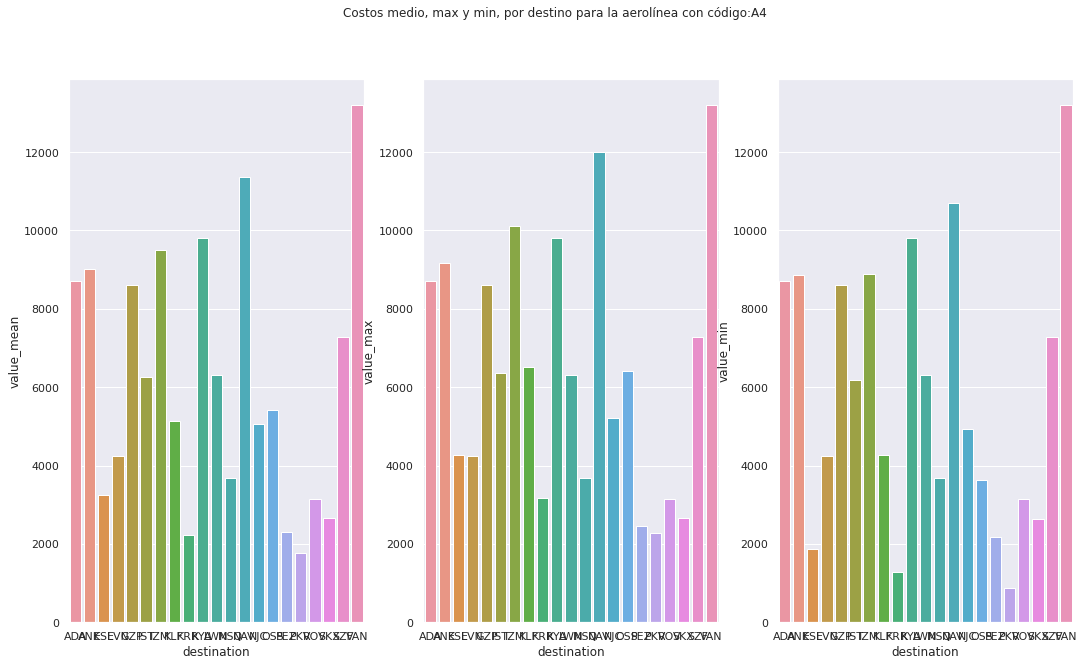

In [29]:
#Costo promedio, mínimo y máximo de cada ruta, por cada aerolínea
mean_values = data.groupby(['airline','destination']).value.mean().reset_index()
min_values = data.groupby(['airline','destination']).value.min().reset_index()
max_values = data.groupby(['airline','destination']).value.max().reset_index()

merged_df=mean_values.merge(max_values,on=["airline", "destination"],suffixes=('_mean', '_max')).merge(min_values,on=["airline", "destination"])
merged_df.rename(columns = {'value':'value_min'}, inplace = True)
merged_df.head()

aerolineas = []
for dest in merged_df.groupby(['airline']):
  aerolineas.append(dest[0])
#print(aerolineas)

count = 1
for dest in merged_df.groupby(['airline']):
  if(aerolineas[10] == dest[0]):
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))
    fig.suptitle('Costos medio, max y min, por destino para la aerolínea con código:'+dest[0])
    sns.barplot(ax=axes[0], data=dest[1], x='destination', y='value_mean')
    sns.barplot(ax=axes[1], data=dest[1], x='destination', y='value_max')
    sns.barplot(ax=axes[2], data=dest[1], x='destination', y='value_min')
  #if (count == 3):
  #    break
  count += 1


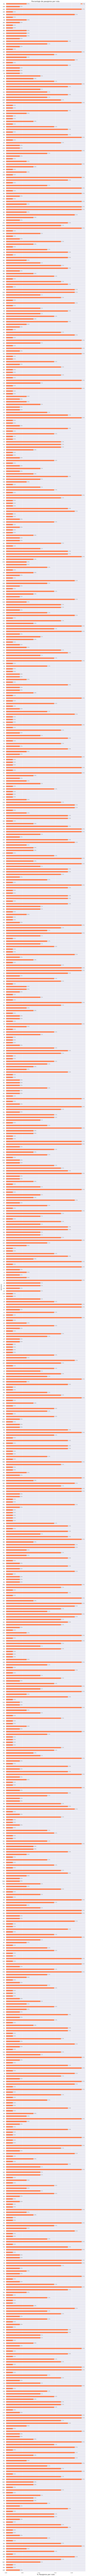

In [30]:
#Porcentaje de pasajeros por ruta 
destination  = data.groupby("destination").count()
destination['%'] = 100 * destination['value'] / data.shape[0]
destination['destination'] = destination.index
#Crear la grafica de barras
ax = destination.plot.barh(x='destination', y="%", figsize=(15, 500), color="coral")
#Se añaden titulos a la grafica
ax.set_alpha(0.8)
ax.set_title("Porcentaje de pasajeros por ruta ", fontsize=18)
ax.set_xlabel("% Pasajeros por ruta", fontsize=18);
#Se crean las etiquetas de las barras
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.0001, i.get_y()+.35, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10, color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

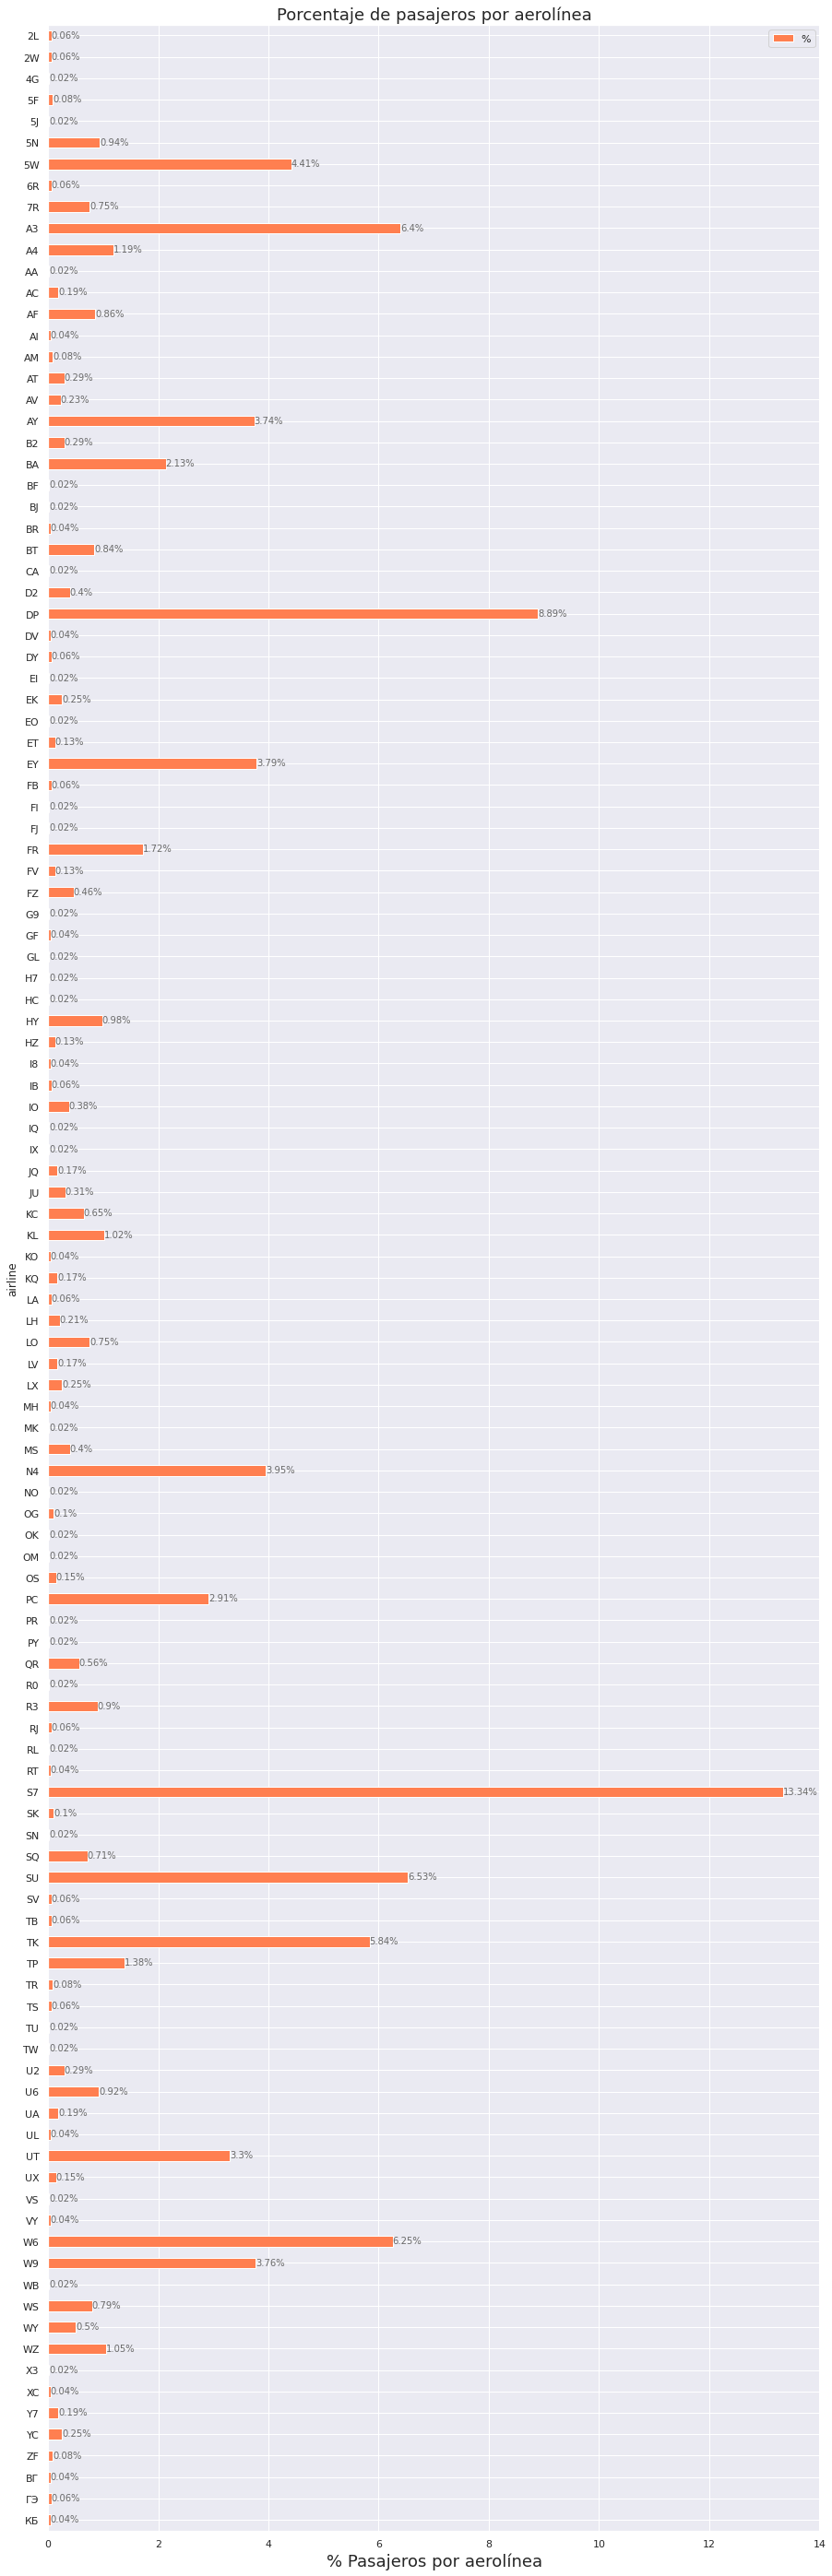

In [31]:
#Porcentaje de pasajeros por aerolínea
airlines  = data.groupby("airline").count()
airlines['%'] = 100 * airlines['value'] / data.shape[0]
airlines['airline'] = airlines.index
#Crear la grafica de barras
ax = airlines.plot.barh(x='airline', y="%", figsize=(15, 50), color="coral")
#Se añaden titulos a la grafica
ax.set_alpha(0.8)
ax.set_title("Porcentaje de pasajeros por aerolínea", fontsize=18)
ax.set_xlabel("% Pasajeros por aerolínea", fontsize=18);
#Se crean las etiquetas de las barras
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.0001, i.get_y()+.35, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10, color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

In [32]:
data.head()

,value,origin,number_of_changes,gate,found_at,destination,depart_date,airline
0,10570.0,MOW,1.0,Kiwi.com,2022-02-09T07:12:09,SPU,2022-02-25,N4
1,7290.0,MOW,2.0,Kiwi.com,2022-02-03T12:52:42,SZF,2022-02-23,A4
2,8130.0,MOW,1.0,KupiBilet.ru,2022-02-09T07:10:22,ABA,2022-02-21,WZ
3,8220.0,MOW,1.0,Kiwi.com,2022-02-09T09:46:49,CAI,2022-02-28,DP
4,6819.0,MOW,2.0,Kiwi.com,2022-02-09T06:08:41,GZT,2022-02-16,DP


In [33]:
#Porcentaje de vuelos por día por aerolínea y Porcentaje de vuelos por día por ruta.
def graph_4_airline(data):
  #Porcentaje de vuelos por día por aerolínea
  days = data.groupby(["depart_date"])["value"].count()
  days_airline = data.groupby(["depart_date","airline"])["value"].count()

  result = []
  for day in days.index:                          # Por cada día
    cant_flights_day = days_airline[day].sum()    # Cantidad de vuelos por día
    for airline in days_airline[day].index:       # Por la aerolinea de cada día
      cant_flights_day_per_airline = days_airline[day][airline]   # Cantidad de vuelos por día por aerolinea
      percent = (cant_flights_day_per_airline / cant_flights_day) * 100         # Porcentaje de vuelos por día por aerolinea
      result.append([day, airline, percent])

  #Se crea un nuevo dataframe con los porcentajes de vuelos por día por aerolínea
  df_days_airline = pd.DataFrame(result, columns=['depart_date', 'airline', '%']) 
  return df_days_airline, days

In [34]:
df_days_airline, days = graph_4_airline(data)

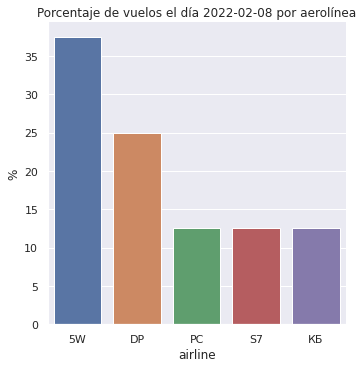

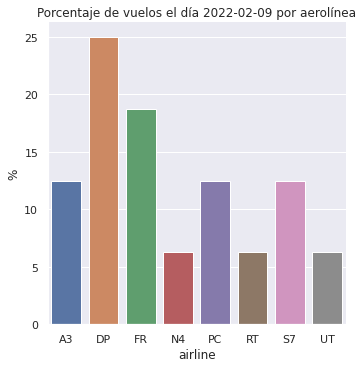

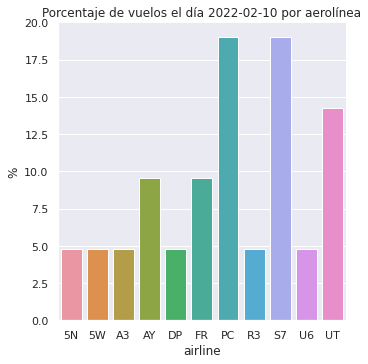

In [35]:
count = 1
for day in df_days_airline.groupby(['depart_date']):          # Se grafican los porcentajes para cada uno de los días
  sns.catplot(x="airline", y="%", kind="bar", data=day[1])
  plt.title("Porcentaje de vuelos el día {} por aerolínea".format(day[0]))
  plt.show
  if (count == 3):
      break
  count += 1

In [36]:
#Porcentaje de vuelos por día por ruta
def graph_4_destination(data, days):
  days_destination = data.groupby(["depart_date","destination"])["value"].count()
  result = []
  for day in days.index:                          # Por cada día
    cant_flights_day = days_destination[day].sum()    # Cantidad de vuelos por día
    for destination in days_destination[day].index:       # Por destinos de cada día
      cant_flights_day_per_destination = days_destination[day][destination]   # Cantidad de vuelos por día por destino
      percent = (cant_flights_day_per_destination / cant_flights_day) * 100         # Porcentaje de vuelos por día por ruta
      result.append([day, destination, percent])

  #Se crea un nuevo dataframe con los porcentajes de vuelos por día por ruta
  df_days_destination = pd.DataFrame(result, columns=['depart_date', 'destination', '%']) 
  return df_days_destination

In [37]:
df_days_destination = graph_4_destination(data, days)

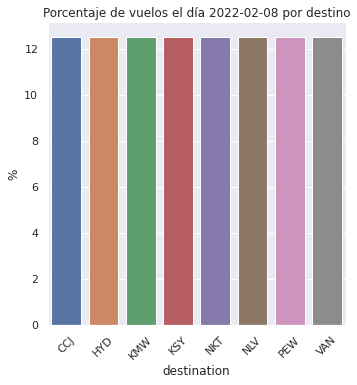

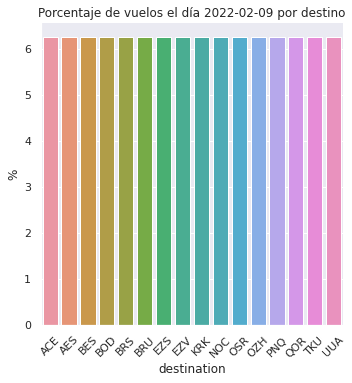

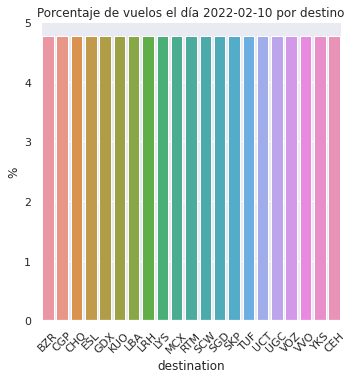

In [38]:
count = 1
for day in df_days_destination.groupby(['depart_date']):          # Se grafican los porcentajes para cada uno de los días
  sns.catplot(x="destination", y="%", kind="bar", data=day[1], height = 5)
  plt.title("Porcentaje de vuelos el día {} por destino".format(day[0]))
  plt.xticks(rotation= 45);
  plt.show
  if (count == 3):
      break
  count += 1

In [39]:
#Ingresos por tipo de tiquete, por día, por vuelo
def graph_5_ingresos(data):
  #Los tipos de tiquete son: directo o con escala.
  data["type"] = data["number_of_changes"].apply(lambda x: "directo" if x==0.0 else "con escala")  # Agrego el tipo de vuelo en una columna
  ingresos = data.groupby(["depart_date","type","destination"])["value"].sum()

  result = []
  for day, ticket_type, flight in ingresos.index:                          # Por cada día
    result.append([day, ticket_type, flight, ingresos[day][ticket_type][flight]])

  #Se crea un nuevo dataframe con los ingresos de vuelos por día por aerolínea
  df_ingresos = pd.DataFrame(result, columns=[ 'day', 'type', 'flight','value']) 
  return df_ingresos

In [40]:
df_ingresos = graph_5_ingresos(data)

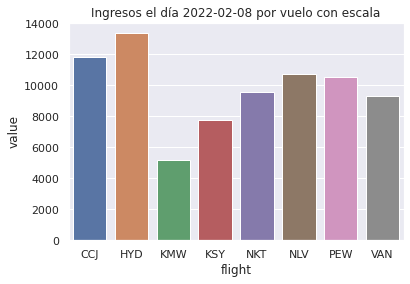

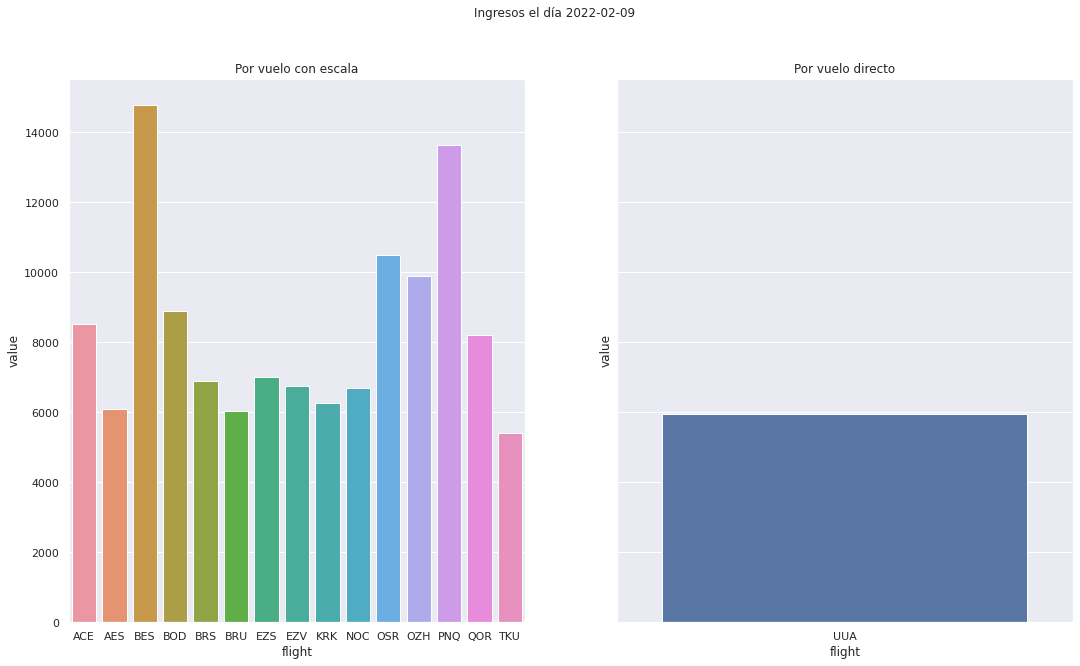

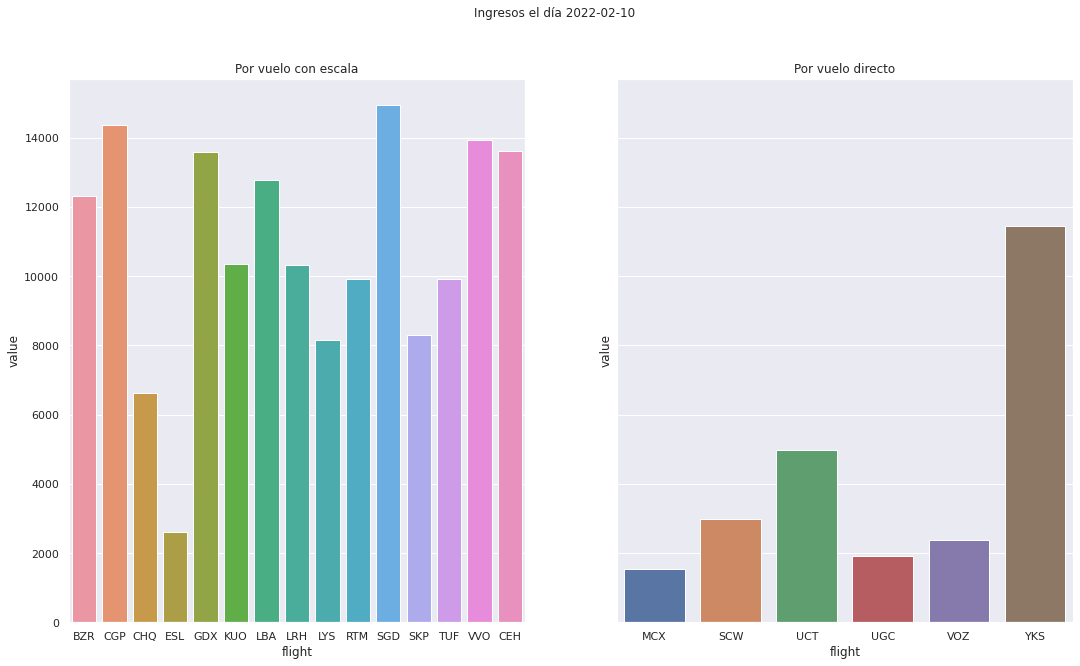

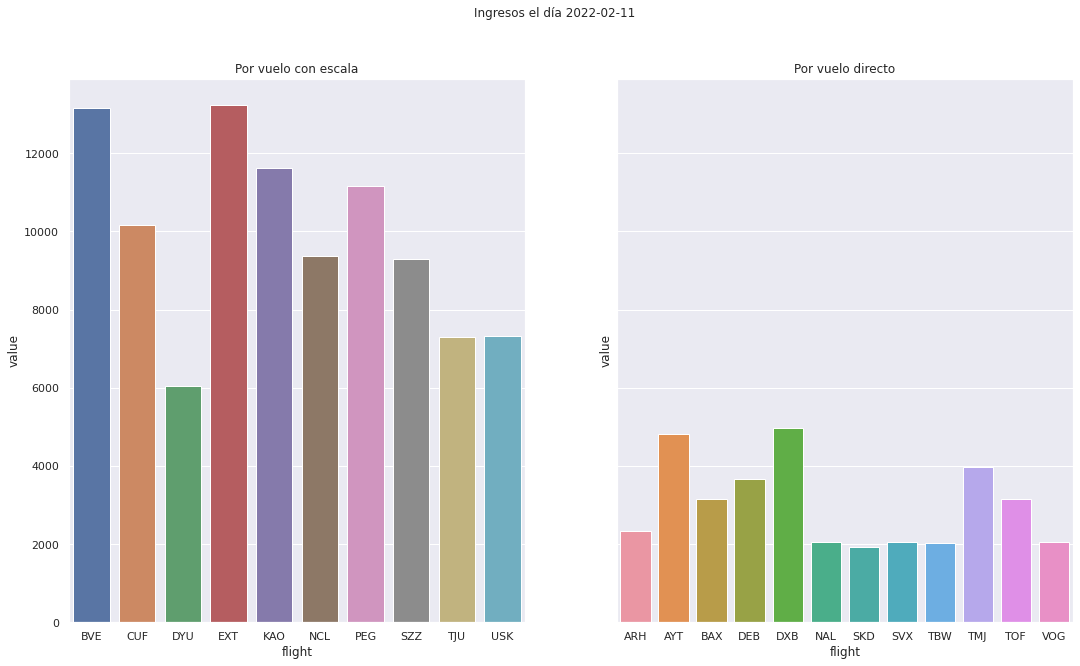

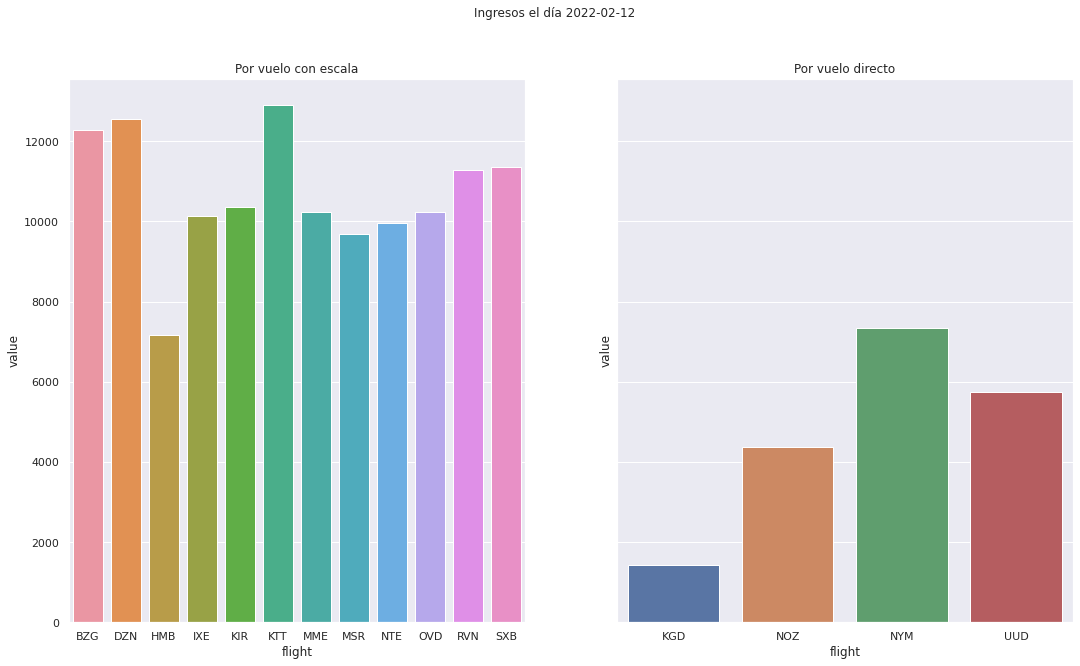

In [41]:
count = 1
for flight in df_ingresos.groupby(["day"]):          # Se grafican los porcentajes para cada uno de los días
  if flight[1]["type"].unique().size == 1:
    bar = sns.barplot(data=flight[1], x='flight', y='value')
    bar.set_title("Ingresos el día {} por vuelo {}".format(flight[0],flight[1]["type"].unique()[0]))
  else:
    fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)
    axes[0].set_title("Por vuelo con escala")
    axes[1].set_title("Por vuelo directo")
    fig.suptitle("Ingresos el día {}".format(flight[0]))
    sns.barplot(ax=axes[0], data=flight[1][flight[1]["type"]=="con escala"], x='flight', y='value')
    sns.barplot(ax=axes[1], data=flight[1][flight[1]["type"]=="directo"], x='flight', y='value')
  if (count == 5):
      break
  count += 1


# **Aplicación**

In [42]:
!pip install jupyter-dash
!pip install dash-bootstrap-components

     |████████████████████████████████| 9.8 MB 13.4 MB/s 
     |████████████████████████████████| 357 kB 54.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=e8606c8a412f3846d991b77ceaa2f4c5d358a60a63ed2a84b29769e3a2958b58
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
     |████████████████████████████████| 210 kB 9.7 MB/s 


In [43]:
#Textos de la aplicación

textDescriptionT1 = "En este apartado se agrupan los vuelos por aerolínea y por país de destino, así, en la tabla se muestran tres columnas correspondientes al número de vuelos de cada agrupación dada por el código de aerolínea y el código del país de destino."
textDescriptionT2 = "Aquí se listan los vuelos por aerolínea y por día, dando la opcióna usted como usuario elegir si desea visualizar los datos por día del vuelo de mayor a menor o de menor a mayor."
textDescriptionT3 = "A continuación se listan los vuelos por la ciudad de destino y cantidad de escalas, teniendo la posibilidad el usuario de elegir si desea visualizar los datos por cantidad de pasajeros de mayor a menor o de menor a mayor."
textDescriptionT4 = "Se listan las aerolineas con mayores y menores ingresos por ruta, el orden de visualización es elegido por el usuario que puede ser por ingresos de menor a mayor o de mayor a menor."
textDescriptionT5 = "Se halla el costo promedio por vuelo, esto es: "
textDescriptionT5_2 = "Así también, se presenta el ingreso promedio por vuelo por ciudad de destino."
textDescriptionT6 = "Se entrega el total de pasajeros movilizados en el inventario, esto por cada uno de los productos donde se consiguió el vuelo, así mismo se le da la posibilidad al usuario de elegir si desea visualizar de menor a mayor o de mayor a menor la cantidad de pasajeros."
textDescriptionT7 = "Se presenta la cantidad de dinero recaudado por ruta por aerolínea en un rango de tiempo ingresado por el usuario."
textDescriptionT8 = "Se presenta de forma grafica el costo promedio, mínimo y máximo de cada ruta, por cada aerolínea, aquí el usuario podrá seleccionar la aerolínea para la cual desea visualizar los datos."
textDescriptionT9 = "Se presenta el porcentaje de pasajeros por cada ruta de manera gráfica, aquí el usuario puede interactuar con la grafica para ver de mejor manera los datos que desea visualizar."
textDescriptionT10 = "Se presenta el porcentaje de pasajeros por cada aerolínea de manera gráfica, aquí el usuario puede interactuar con la grafica para ver de mejor manera los datos que desea visualizar."
textDescriptionT11 = "Se presenta el porcentaje de vuelos por día por aerolínea y por ruta, para una mejor presentación el usuario puede seleccionar el día del cual desea visualizar las graficas de porcentaje de vuelos por aerolínea y  por ruta."
textDescriptionT12 = "Se presentan graficamente los ingresos por tipo de tiquete si es con escala o directo, por día por destino de vuelo, el usuario puede seleccionar el día del cual desea visualizar las graficas."



In [44]:
from jupyter_dash import JupyterDash
import dash
from dash import Input, Output, State, dcc, html
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from matplotlib import figure
from datetime import timedelta, datetime, date

def generate_table(dataframe, max_rows=5000):
  table_header = [
    html.Thead([
      html.Tr([html.Th(col) for col in dataframe.columns])        
    ])
  ]

  table_body = [
    html.Tbody([
      html.Tr([
        html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
      ]) for i in range(min(len(dataframe), max_rows))
    ])
  ]

  table = dbc.Table(table_header + table_body, bordered=True,
    dark=True,
    hover=True,
    responsive=True,
    striped=True,)
  
  return table


tab1_content = dbc.Card(
    dbc.CardBody(
        [
          html.P(textDescriptionT1, className="card-text"),
          html.Div(
              generate_table(punto_1(data)),
              style={"maxHeight": "600px", "overflow": "scroll"},
          ),
        ]
    ),
    className="mt-3",
)

tab2_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT2, className="card-text"),
            html.H6("Seleccione el orden de visualización que desea:", className="card-text"),
            dcc.Dropdown(
                id = 'dropdown-to-show_or_hide-element',
                options=[
                    {'label': 'De menor a mayor', 'value': "1"},
                    {'label': 'De mayor a menor', 'value': "2"}
                ],
                value = "1"
            ),
            html.Hr(),
                # Create Div to place a conditionally visible element inside
            html.Div(
                id='menor-mayor',
                children = [
                  # Element to hide/show,
                  html.Div(
                    generate_table(punto_2(data, True)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
            html.Div(
                id='mayor-menor',
                children = [
                  # Element to hide/show, 
                  html.Div(
                    generate_table(punto_2(data, False)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
        ]
    ),
    className="mt-3",
)


tab3_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT3, className="card-text"),
            html.H6("Seleccione el orden de visualización que desea:", className="card-text"),
            dcc.Dropdown(
                id = 'dropdown-to-show_or_hide-element-2',
                options=[
                    {'label': 'De menor a mayor', 'value': "1"},
                    {'label': 'De mayor a menor', 'value': "2"}
                ],
                value = "1"
            ),
            html.Hr(),
                # Create Div to place a conditionally visible element inside
            html.Div(
                id='menor-mayor-2',
                children = [
                  # Element to hide/show,
                  html.Div(
                    generate_table(punto_3(data, True)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
            html.Div(
                id='mayor-menor-2',
                children = [
                  # Element to hide/show, 
                  html.Div(
                    generate_table(punto_3(data, False)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
        ]
    ),
    className="mt-3",
)

tab4_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT4, className="card-text"),
            html.H6("Seleccione el orden de visualización que desea:", className="card-text"),
            dcc.Dropdown(
                id = 'dropdown-to-show_or_hide-element-3',
                options=[
                    {'label': 'De menor a mayor', 'value': "1"},
                    {'label': 'De mayor a menor', 'value': "2"}
                ],
                value = "1"
            ),
            html.Hr(),
                # Create Div to place a conditionally visible element inside
            html.Div(
                id='menor-mayor-3',
                children = [
                  # Element to hide/show,
                  html.Div(
                    generate_table(punto_4(data, True)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
            html.Div(
                id='mayor-menor-3',
                children = [
                  # Element to hide/show, 
                  html.Div(
                    generate_table(punto_4(data, False)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
        ]
    ),
    className="mt-3",
)

data5 = punto_5(data)

tab5_content = dbc.Card(
    dbc.CardBody(
        [
          html.P(textDescriptionT5, className="card-text"),
          html.P(data5[1], className="card-text"),
          html.P(textDescriptionT5_2, className="card-text"),
          html.Div(
              generate_table(data5[0]),
              style={"maxHeight": "600px", "overflow": "scroll"},
          ),
        ]
    ),
    className="mt-3",
)

tab6_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT6, className="card-text"),
            html.H6("Seleccione el orden de visualización que desea:", className="card-text"),
            dcc.Dropdown(
                id = 'dropdown-to-show_or_hide-element-4',
                options=[
                    {'label': 'De menor a mayor', 'value': "1"},
                    {'label': 'De mayor a menor', 'value': "2"}
                ],
                value = "1"
            ),
            html.Hr(),
                # Create Div to place a conditionally visible element inside
            html.Div(
                id='menor-mayor-4',
                children = [
                  # Element to hide/show,
                  html.Div(
                    generate_table(punto_6(data, True)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
            html.Div(
                id='mayor-menor-4',
                children = [
                  # Element to hide/show, 
                  html.Div(
                    generate_table(punto_6(data, False)),
                    style={"maxHeight": "600px", "overflow": "scroll"},
                  ),
                ], style= {'display': 'block'} # <-- This is the line that will be changed by the dropdown callback
            ),
        ]
    ),
    className="mt-3",
)

tab7_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT7, className="card-text"),
            html.H6("Seleccione el rango de fechas que desea:", className="card-text"),
            dbc.Row(
              [
                dbc.Col(
                    html.Div(dcc.DatePickerRange(
                      id="date-picker",
                      end_date=date(2022, 2, 9),
                      start_date=date(2022, 2, 8),
                      display_format='YYYY-MM-DD',
                      start_date_placeholder_text='YYYY-MM-DD'
                      ),
                    ),
                    width={"size": 3, "order": 1, "offset": 2},
                ),
                dbc.Col(
                    html.Div(dbc.Button(
                        "Calcular", id="example-button", className="me-2", size="lg", n_clicks=0
                      ),
                    ),
                    width={"size": 4, "order": 2, "offset": 1},
                ),
              ],
              className="g-0",
            ),   # Create Div to place a conditionally visible element inside
            html.Hr(),
            html.Div(
                id='out_7', children=[],
                style={"maxHeight": "600px", "overflow": "scroll"},
            ),
        ]
    ),
    className="mt-3",
)


mean_values = data.groupby(['airline','destination']).value.mean().reset_index()
min_values = data.groupby(['airline','destination']).value.min().reset_index()
max_values = data.groupby(['airline','destination']).value.max().reset_index()

merged_df=mean_values.merge(max_values,on=["airline", "destination"],suffixes=('_mean', '_max')).merge(min_values,on=["airline", "destination"])
merged_df.rename(columns = {'value':'value_min'}, inplace = True)

aerolineas = []
for dest in merged_df.groupby(['airline']):
  aerolineas.append(dest[0])

options_graph1 = [{'label': aerolineas[i], 'value':aerolineas[i]} for i in range(len(aerolineas))]


graph1_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT8, className="card-text"),
            html.H6("Seleccione la aerolínea para la que desea visualizar las graficas:", className="card-text"),
            dcc.Dropdown(
                id='select-stat-dropdown-graph1',
                options=options_graph1,
            ),
            html.Hr(),
            html.Div([
                dcc.Graph(id='example-graph')
            ]),
        ]
    ),
    className="mt-3",
)


#Porcentaje de pasajeros por ruta 
destination  = data.groupby("destination").count()
destination['%'] = 100 * destination['value'] / data.shape[0]
destination['destination'] = destination.index
#Crear la grafica de barras
graph2 = px.bar(destination, x="destination", y="%")
graph2.update_layout(title_text="Porcentaje de Pasajeros por Ruta", showlegend=True)

graph2_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT9, className="card-text"),
            html.Hr(),
            html.Div([
                dcc.Graph(id='graph2', figure=graph2)
              ],
              style={"maxHeight": "600px", "overflow": "scroll"},
            ),
        ]
    ),
    className="mt-3",
)


#Porcentaje de pasajeros por aerolínea
airlines  = data.groupby("airline").count()
airlines['%'] = 100 * airlines['value'] / data.shape[0]
airlines['airline'] = airlines.index
#Crear la grafica de barras
graph3 = px.bar(airlines, x="airline", y="%")
graph3.update_layout(title_text="Porcentaje de Pasajeros por Aerolínea", showlegend=True)

graph3_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT10, className="card-text"),
            html.Hr(),
            html.Div([
                dcc.Graph(id='graph3', figure=graph3)
              ],
              style={"maxHeight": "600px", "overflow": "scroll"},
            ),
        ]
    ),
    className="mt-3",
)


#Porcentaje de vuelos por día por aerolínea y Porcentaje de vuelos por día por ruta.
df_days_airline, days = graph_4_airline(data)
df_days_destination = graph_4_destination(data, days)

dias = []
for day in df_days_airline.groupby(['depart_date']):
  dias.append(day[0])

options_graph4 = [{'label': dias[i], 'value':dias[i]} for i in range(len(dias))]


graph4_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT11, className="card-text"),
            html.H6("Seleccione el día para el que desea visualizar las graficas:", className="card-text"),
            dcc.Dropdown(
                id='select-stat-dropdown-graph4',
                options=options_graph4,
            ),
            html.Hr(),
            html.Div([
                dcc.Graph(id='graph4')
            ]),
        ]
    ),
    className="mt-3",
)


#Ingresos por tipo de tiquete, por día, por vuelo
df_ingresos = graph_5_ingresos(data)

dias_ingreso = []
for day in df_ingresos.groupby(["day"]): 
  dias_ingreso.append(day[0])

options_graph5 = [{'label': dias_ingreso[i], 'value': dias_ingreso[i]} for i in range(len(dias_ingreso))]

graph5_content = dbc.Card(
    dbc.CardBody(
        [
            html.P(textDescriptionT12, className="card-text"),
            html.H6("Seleccione el día para el que desea visualizar las graficas:", className="card-text"),
            dcc.Dropdown(
                id='select-stat-dropdown-graph5',
                options=options_graph5,
            ),
            html.Hr(),
            html.Div([
                dcc.Graph(id='graph5')
            ]),
        ]
    ),
    className="mt-3",
)


app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = dbc.Container(
    [
      dcc.Store(id="store"),
      html.H1("Bienvenido Reto Tecnológico 4"),
      html.Hr(),
      html.H4("Integrantes:"),
      html.H5("Ricardo Tangarife González, Daniel Borrás Jiménez, Santiago López Aristizábal y Michael Stiven Bustos Aguirre"),
      html.Hr(),
     
      dbc.Tabs(
          [
              dbc.Tab(tab1_content, label="Datos 1", tab_id="d1"),
              dbc.Tab(tab2_content, label="Datos 2", tab_id="d2"),
              dbc.Tab(tab3_content, label="Datos 3", tab_id="d3"),
              dbc.Tab(tab4_content, label="Datos 4", tab_id="d4"),
              dbc.Tab(tab5_content, label="Datos 5", tab_id="d5"),
              dbc.Tab(tab6_content, label="Datos 6", tab_id="d6"),
              dbc.Tab(tab7_content, label="Datos 7", tab_id="d7"),
              dbc.Tab(graph1_content, label="Graficas 1", tab_id="g1"),
              dbc.Tab(graph2_content, label="Graficas 2", tab_id="g2"),
              dbc.Tab(graph3_content, label="Graficas 3", tab_id="g3"),
              dbc.Tab(graph4_content, label="Graficas 4", tab_id="g4"),
              dbc.Tab(graph5_content, label="Graficas 5", tab_id="g5"),
              dbc.Tab(
                  "This tab's content is never seen", label="About", tab_id="g6", disabled=True
              ),
          ],
          id="tabs",
          active_tab="d2",
      ),
      html.Div(id="tab-content", className="p-4"),
    ],
    className="p-2",
)

@app.callback(
   [Output(component_id='menor-mayor', component_property='style'), Output(component_id='mayor-menor', component_property='style')],
   [Input(component_id='dropdown-to-show_or_hide-element', component_property='value')])

def show_hide_element(visibility_state):
    if visibility_state == "1":
        return {'display': 'block'},{'display': 'none'}
    elif visibility_state == "2":
        return {'display': 'none'},{'display': 'block'}
    else:
        return {'display': 'none'},{'display': 'none'}

@app.callback(
   [Output(component_id='menor-mayor-2', component_property='style'), Output(component_id='mayor-menor-2', component_property='style')],
   [Input(component_id='dropdown-to-show_or_hide-element-2', component_property='value')])

def show_hide_element_2(visibility_state):
    if visibility_state == "1":
        return {'display': 'block'},{'display': 'none'}
    elif visibility_state == "2":
        return {'display': 'none'},{'display': 'block'}
    else:
        return {'display': 'none'},{'display': 'none'}

@app.callback(
   [Output(component_id='menor-mayor-3', component_property='style'), Output(component_id='mayor-menor-3', component_property='style')],
   [Input(component_id='dropdown-to-show_or_hide-element-3', component_property='value')])

def show_hide_element_3(visibility_state):
    if visibility_state == "1":
        return {'display': 'block'},{'display': 'none'}
    elif visibility_state == "2":
        return {'display': 'none'},{'display': 'block'}
    else:
        return {'display': 'none'},{'display': 'none'}

@app.callback(
   [Output(component_id='menor-mayor-4', component_property='style'), Output(component_id='mayor-menor-4', component_property='style')],
   [Input(component_id='dropdown-to-show_or_hide-element-4', component_property='value')])

def show_hide_element_4(visibility_state):
    if visibility_state == "1":
        return {'display': 'block'},{'display': 'none'}
    elif visibility_state == "2":
        return {'display': 'none'},{'display': 'block'}
    else:
        return {'display': 'none'},{'display': 'none'}


@app.callback(
    Output('out_7', 'children'),
    [Input("date-picker", "start_date"), Input("date-picker", "end_date")],
    [State("example-button", "n_clicks")],
)
def update_graph_2(start_date, end_date, n_clicks):
    return generate_table(punto_7(data, start_date, end_date))

@app.callback(
    Output('example-graph', 'figure'),
    [Input('select-stat-dropdown-graph1', 'value')])
def combine_heat_pitch_map(value):
    fig = {}
    for dest in merged_df.groupby(['airline']):
      if(value == dest[0]):
        fig = make_subplots(rows=1, cols=3, subplot_titles=("Costo Promedio", "Costo Máximo", "Costo Mínimo"))
        fig1 = px.bar(dest[1], x="destination", y="value_mean")
        fig2 = px.bar(dest[1], x="destination", y="value_max")
        fig3 = px.bar(dest[1], x="destination", y="value_min")
        fig.update_layout(title_text="Costo Promedio, Máximo y Mínimo Por Ruta de la Aerolínea "+value, showlegend=True)

        fig.add_trace(fig1['data'][0], row=1, col=1)
        fig.add_trace(fig2['data'][0], row=1, col=2)
        fig.add_trace(fig3['data'][0], row=1, col=3)
        break
    return fig


@app.callback(
    Output('graph4', 'figure'),
    [Input('select-stat-dropdown-graph4', 'value')])
def change_graph_day(value):
    fig = {}
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Porcentaje por Aerolínea", "Porcentaje por Destino"))
    for day in df_days_airline.groupby(['depart_date']):
      if(value == day[0]):
        fig1 = px.bar(day[1], x="airline", y="%")
        fig.add_trace(fig1['data'][0], row=1, col=1)
        break
    for day in df_days_destination.groupby(['depart_date']):          # Se grafican los porcentajes para cada uno de los días
      if(value == day[0]):
        fig2 = px.bar(day[1], x="destination", y="%")
        fig.add_trace(fig2['data'][0], row=1, col=2)
        break   
    if not value:
      fig = {} 
      return fig
    fig.update_layout(title_text="Porcentaje de vuelos por aerolínea y por destino del día "+value, showlegend=True)
    return fig
     

@app.callback(
    Output('graph5', 'figure'),
    [Input('select-stat-dropdown-graph5', 'value')])
def change_graph_day(value):
    fig = {}
    for day in df_ingresos.groupby(["day"]):
      if(value == day[0]):
        if day[1]["type"].unique().size == 1:
          fig = px.bar(day[1], x="flight", y="value")
        else:
          fig = make_subplots(rows=1, cols=2, subplot_titles=("Ingresos por Vuelo con Escala", "Ingresos por Vuelo Directo"))
          fig1 = px.bar(day[1][day[1]["type"]=="con escala"], x="flight", y="value")
          fig2 = px.bar(day[1][day[1]["type"]=="directo"], x="flight", y="value")
          fig.add_trace(fig1['data'][0], row=1, col=1)
          fig.add_trace(fig2['data'][0], row=1, col=2)
        break
    if not value:
      fig = {} 
      return fig
    fig.update_layout(title_text="Ingresos por tipo de vuelo del día "+value, showlegend=True)
    return fig



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [45]:
app.run_server(mode="external")

Dash app running on:


<IPython.core.display.Javascript object>